<a href="https://colab.research.google.com/github/fabiodotcom/Data-Science/blob/main/Credit_Card_Fraud_Detection_With_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Credit Card Fraud Detection With Machine Learning**

![](https://drive.google.com/uc?export=view&id=12hXDykxaarAZwsp28lN3FlMu3JgK2kt7)

Photo by [Paul Felberbauer](https://unsplash.com/@servuspaul) on [Unplash](https://unsplash.com/photos/idNOBU5k_80)

Although the new payment formats, the credit card still holds the major part of money transactions. Due to the online shopping growth, transactions using credit cards have been more frequent. Which in turn helps in practicality and speed of payments it also attracts criminal attention. 

We can summarize these occurrences as the improper use of credit/debit cards to make fraudulent transactions, obtaining money and goods. Where the numbers are taken by websites without protection, malicious credit machines, and numbers shared using social media apps.

To avoid losses and also the protection of their clients, credit card companies had been invested in technologies to avoid and reduce this kind of occurrence, the use of machine learning models has been shown as a powerful tool for fraud detection, once it uses a large quantity of data collected in the past to verify and classify the new transactions in real-time.

In this article, we will implement a machine learning model using [python](https://www.python.org/), [pandas](https://pandas.pydata.org/), and [scikit-learn](https://scikit-learn.org/stable/) to grab a transaction database and train the model to be able to classify new transactions as fraudulent or not. 

### About the Dataset

To make the analysis, we will use a database from two days of bank transactions realized in September 2013 by European cardholders. The dataset is available for download in [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) has about 285 thousand transactions, where 492 operations have been classified as scams or fraud. Due to the confidentiality issues, the personal data for the customers have been anonymized, the variables renamed from V1 through V28, and the data transformed using (*Principal Component Analysis* - PCA), which in this case has been used to reduce the dimensionality of the numerical values, below there are described the only variables without changes.

*   `Time` - Contains the seconds elapsed between each transaction;
*   `Amount` - Total transactioned value;
*   `Class` - Label given from transactions, where `0` represent a normal transaction and `1` reffers to a fraudulent transaction.


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid',palette='cividis')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Creating the dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

### Exploratory Analysis

In this section, we'll make a preliminary data analysis, to verify the variables in the dataset, statistical summary, null values, outliers, and histograms of legal and illegal transactions.

In [ ]:
# dataset values
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# dataset statistical summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# null values checking
print('Total of Null Values:', df.isnull().sum().max())

Total of Null Values: 0


0    284315
1       492
Name: Class, dtype: int64


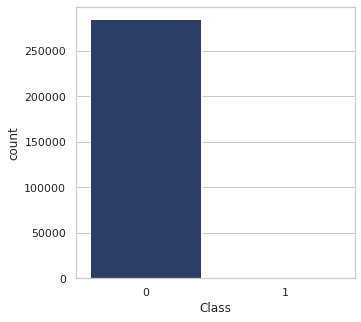

In [ ]:
# checking the balance between legal and illegal transactions
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Class',data=df);
print(pd.Series(df.Class).value_counts())
plt.show()

There's a considerable discrepancy between the legal `[0]` transactions and illegal `[1]` occurrences. Due to this, the dataset will be balanced before the setup of the machine learning model.

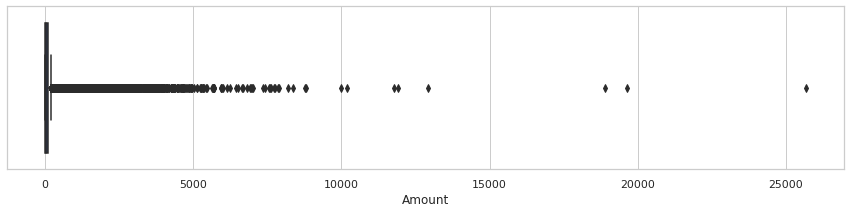

In [ ]:
# checking outliers in `Amount` values
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df)
plt.show()

As we can see in the previous image, there's a lot of outliers in the `Amount` column, we will perform a cleaning of these values and redo the plot to check how it goes.

In [ ]:
# checking outlier values 
q1_amount = df.Amount.quantile(.25)
q3_amount = df.Amount.quantile(.75)
IQR_amount = q3_amount - q1_amount
print('IQR: ', IQR_amount)

# defining limits                                       
sup_amount = q3_amount + 1.5 * IQR_amount
inf_amount = q1_amount - 1.5 * IQR_amount

print('Upper limit: ', sup_amount)
print('Lower limit: ', inf_amount)

IQR:  71.565
Upper limit:  184.5125
Lower limit:  -101.7475


In [ ]:
# cleaning the outliers in `Amount` values
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Amount>184.49].index, axis=0, inplace=True)

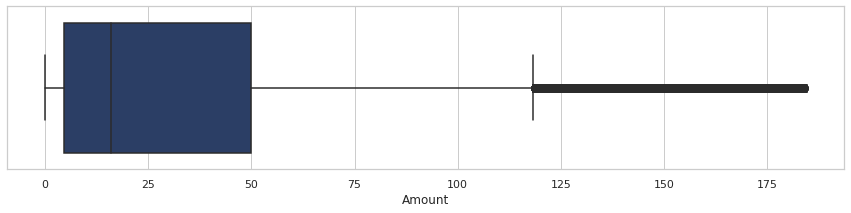

In [ ]:
# new boxplot for `Amount` values
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df_clean)
plt.show()

After cleaning the outliers from the dataset, the values in the `Amount` column are less discrepant and the boxplot easier to read.

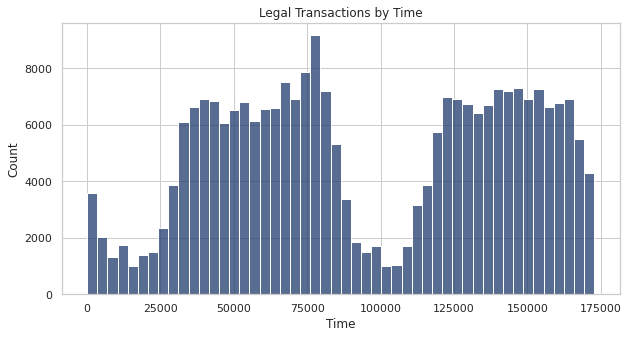

In [ ]:
# legal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Time[df_clean.Class==0]), bins=50);
ax.set_title('Legal Transactions by Time')
plt.show()

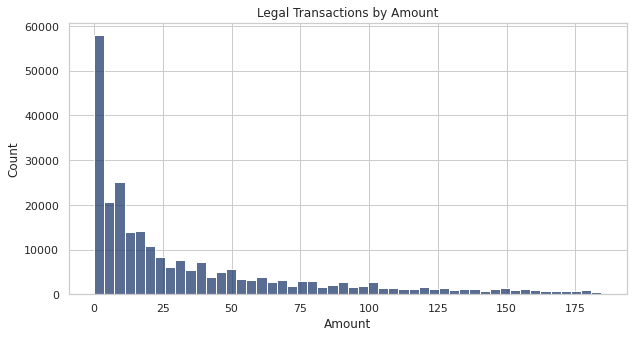

In [ ]:
# legal transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Amount[df_clean.Class==0]), bins=50)
ax.set_title('Legal Transactions by Amount')
plt.show()

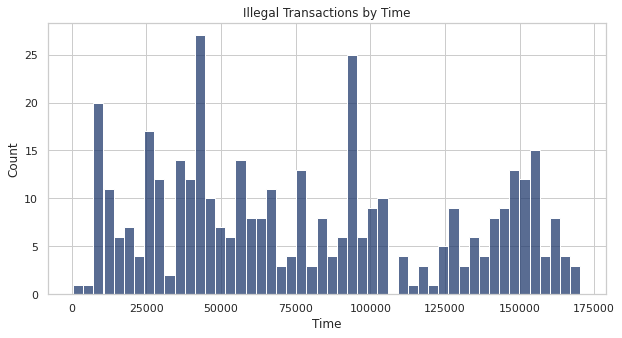

In [ ]:
# illegal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Time[df_clean.Class==1]), bins=50)
ax.set_title('Illegal Transactions by Time')
plt.show()

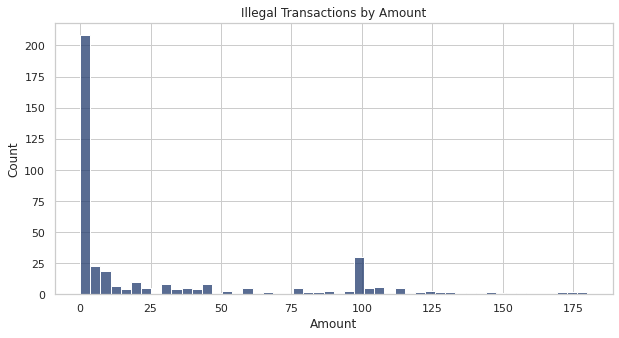

In [ ]:
# illegal transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Amount[df_clean.Class==1]), bins=50)
ax.set_title('Illegal Transactions by Amount')
plt.show()

### Pre-Processing Data

Before we create the machine learning model, we will need to make some adjustments to the dataset values. The steps are listed below:


*   Standardize the `Time` and `Amount` values;
*   Divide the dataset into train and test;
*   Balance the values.

In [ ]:
# importing scikit-learn modules

!pip install -q scikit-plot
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

#### Standardize Process

The Standardize process, consists in make transformations in the data structure, minimize the redundant values and remove the mean and scaling to unit variance.

In [ ]:
# creating a copy of the original dataset
df_new = df_clean.copy()

# standardize data
scaler = StandardScaler()
df_new['Amount'] = scaler.fit_transform(df_new.Amount.values.reshape(-1, 1))
df_new['Time'] = scaler.fit_transform(df_new.Time.values.reshape(-1, 1))

# check the standardized data
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.995712,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.719341,0
1,-1.995712,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.765588,0
3,-1.995691,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.099819,0
4,-1.995670,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.830653,0
5,-1.995670,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.742344,0


#### Dividing the dataset in train and test

The train/test split it's an important step in machine learning process. Where the model is split into two sets: training and testing set. Usually, the major part of the dataset is reserved for the training and a small part for testing. The train data will be used to create the machine learning model, and the test data is used to check the accuracy of the model.

In [ ]:
# train and test data
X = df_new.drop('Class', axis=1)
y = df_new['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

#### Balancing dataset

As we can see in the exploratory analysis, we have a discrepancy between the number of legal transactions and frauds. To feed the machine learning model without any bias. We will perform the balance of the dataset to keep the values as close as possible. 


1    301
0    301
dtype: int64


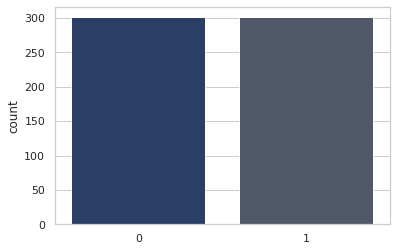

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler() 

# resampling X, y
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# new class distribution
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);

Now, with the balanced dataset, we can proceed with the setup of the machine learning model.

### Machine Learning Model

In [ ]:
# setup the machine learning model:
np.random.seed(2)
model = LogisticRegression(C=0.01)
model.fit(X_rus, y_rus, sample_weight=True)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# model predictions:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

### Model Performance

In the report below, we've some metrics to check the model performance, let's make a brief explanation about how to understand those values, and evaluate the machine learning model. Before explaining the mathematical formulas, we will explain some terms and what it does represent.

* **TN - True Negative:** when a case was negative and predicted negative;
* **TP - True Positive:** when a case was positive and predicted positive;
* **FN - False Negative:** when a case was positive but predicted negative;
* **FP - False Positive:** when a case was negative but predicted positive.

**Accuracy -** What percent of predictions the model did correctly?

$${\text{Accuracy: }}\frac{\text{Number of Correct Predictions}} {\text{Total Number of Predictions}}$$


**Precision -** What percent of the predictions were correct?

$${\text{Precision: }}\frac {\text{TP}} {\text{TP+FP}}$$

**Recall -** What percent of the positive cases the model catch?

$${\text{Recall: }}\frac{\text{TP}} {\text{TP+FN}}$$

**F1-Score -** What percent of positive predictions were correct?

$${\text{F1-Score: }}\frac{\text{2 (Recall x Precision)}}  {\text{Recall + Precision}}
$$








Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.990     0.995     63123
           1      0.130     0.920     0.228       100

    accuracy                          0.990     63223
   macro avg      0.565     0.955     0.611     63223
weighted avg      0.998     0.990     0.994     63223



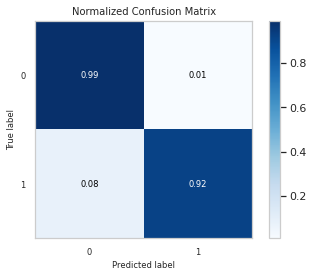

In [ ]:
# classification report
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, text_fontsize='small', title_fontsize='medium', cmap='Blues');
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

### Conclusion

The use of technologies in credit card fraud detection using machine learning models, shows a powerful tool, once the models receive huge quantities of new data every day. Although we have reached good results in the model, it's important to make tests in new databases, to observe and improve the model performance. 